In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv(".\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
from lightgbm import LGBMClassifier

In [6]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [7]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [8]:
lgbm_params = {"max_depth": [-1,1,3,5,8], "min_child_samples": [10,20,30,50,100], "subsample": [0.6, 0,8, 1],
              "n_estimators": [50,100,150,300]}

In [9]:
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 3918 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 3977 out of 4000 | elapsed:   15.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:   15.3s finished


In [10]:
lgbm_cv_model.best_params_

{'max_depth': 3, 'min_child_samples': 30, 'n_estimators': 50, 'subsample': 0.6}

In [53]:
lgbm_tuned = LGBMClassifier(max_depth = 4, min_child_samples = 30, n_estimators = 20, subsample = 0.6).fit(X_train, y_train)

In [54]:
y_pred = lgbm_tuned.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.7705627705627706

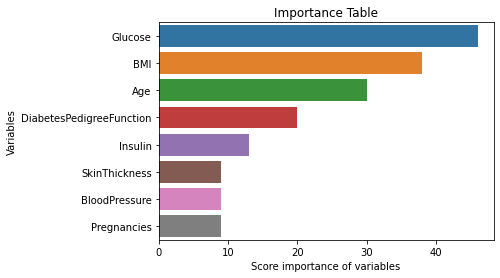

In [57]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_, index = X_train.columns).sort_values(ascending = False)
import seaborn as sns

sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Score importance of variables")
plt.ylabel("Variables")
plt.title("Importance Table")
plt.show()